In [1]:
from zget_data import get_responses, get_qdetails, page_map, attention
import pandas as pd
import json

In [2]:
password_response, time_response, survey_response = get_responses(1)

## Password Analysis

In [3]:
pd.DataFrame(password_response)

,password2
0,6IctttoCM^
1,Ih7nmi!tb
2,TTI7WKAH^FR!
3,Ihbt7c@tya
4,10wIbmdM77!!
5,igmd31#
6,Igmsad45&
7,Litn2023!


## Time Analysis

In [4]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
page_time_df

,fcog,fpassrecall,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,320.098,70.347,8.202,17.538,67.491,274.386,14.882,78.530,13.076,51.190,18.026,87.482,17.020800
1,815.097,26.994,10.508,47.108,374.407,378.374,150.457,215.862,11.023,57.999,35.684,65.852,36.489417
2,6.585,24.890,8.497,39.450,71.585,201.481,13.449,93.033,14.217,50.802,9.465,35.047,9.475017
3,8.089,20.043,7.238,25.501,71.509,136.892,12.608,120.670,38.873,38.905,43.040,41.614,9.416367
4,2.876,15.544,6.985,18.393,57.448,222.693,7.136,60.793,27.642,35.523,15.429,28.119,8.309683
5,2.721,13.333,6.199,55.752,164.901,367.265,7.067,439.670,8.977,40.269,5.388,49.782,19.355400
6,2.641,67.833,6.936,59.551,83.264,241.550,14.590,32.269,9.158,39.150,18.692,33.181,10.146917
7,2.782,36.087,3.235,13.803,48.310,188.851,7.719,23.239,20.637,35.198,5.848,25.818,6.858783


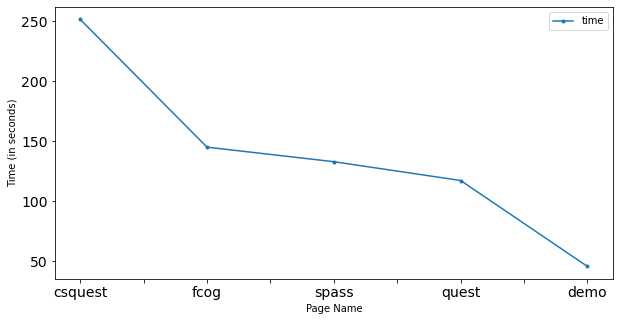

In [5]:
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.mean().sort_values(ascending=False).head(5).items():
    top5 = top5.append(pd.DataFrame([[i, data]], columns=top5.columns), ignore_index=True)

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in seconds)", fontsize=14, style=".-")

## Survey Response Analysis

In [6]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [7]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest

,0,1,2,3,4,5,6,7,mean,median
rewarding,6.0,6.0,6.0,5.0,6.0,7.0,5.0,3.0,5.500,6.000
organized,7.0,7.0,5.0,5.0,7.0,7.0,7.0,4.0,6.125,7.000
structured,7.0,7.0,4.0,5.0,7.0,7.0,7.0,4.0,6.000,7.000
well grouped,7.0,7.0,4.0,5.0,7.0,7.0,7.0,4.0,6.000,7.000
ordered,7.0,7.0,4.0,5.0,7.0,7.0,6.0,3.0,5.750,6.000
beneficial,7.0,7.0,6.0,6.0,7.0,7.0,7.0,4.0,6.375,7.000
helpful,7.0,7.0,6.0,6.0,7.0,7.0,7.0,3.0,6.250,7.000
easy,5.0,6.0,4.0,1.0,6.0,5.0,5.0,2.0,4.250,5.000
appealing,6.0,7.0,1.0,4.0,5.0,4.0,5.0,2.0,4.250,4.250
pleasant,4.0,7.0,1.0,4.0,5.0,4.0,5.0,2.0,4.000,4.000


### CSQuest

In [8]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())

qualindex = ['9-1', '11-1']
csquestqual = csquest.loc[qualindex]
csquestqual.to_csv('qualitative/csquest_infographics.csv')
csquestqual

,0,1,2,3,4,5,6,7
9-1,"[Social Media, Email, Financial Websites]","[Social Media, Email, Financial Websites, Gami...","[Social Media, Email, Gaming Websites, Content...","[Email, Financial Websites, E-commerce Websites]","[Financial Websites, E-commerce Websites, Gove...",[None of the above],"[Social Media, Email, Financial Websites, Gami...",[Social Media]
11-1,"I like the idea. I like the example phrase ""I ...","I like it because really clear, easy to unders...","I think it is a great presentation, and easy t...",it is structured and clear.,I really like how it is laid out on a whiteboa...,It was interesting and informative but I would...,It's easy to follow and I like that it's portr...,Seems simple and affective. I wish the numbers...


In [9]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

,0,1,2,3,4,5,6,7,mean,median
Stimulates me to create a strong password,6.0,6.0,6.0,6.0,5.0,1.0,6.0,5.0,5.125,6.000
Makes me put trust on the presented password creation strategy,5.0,6.0,6.0,6.0,6.0,1.0,6.0,5.0,5.125,6.000
Encourages me to use the presented password creation strategy in real life,6.0,7.0,7.0,5.0,6.0,1.0,7.0,5.0,5.500,6.000
,7.0,7.0,7.0,7.0,7.0,1.0,6.0,6.0,6.000,7.000
Encourages me to create a strong password,7.0,7.0,7.0,6.0,6.0,1.0,7.0,6.0,5.875,6.000
Makes me feel capable of creating a strong password,6.0,7.0,7.0,6.0,7.0,1.0,7.0,5.0,5.750,6.000
Makes me feel confident that I can create a strong password,6.0,7.0,7.0,6.0,7.0,1.0,6.0,5.0,5.625,6.000
,6.0,7.0,6.0,6.0,6.0,1.0,6.0,5.0,5.375,6.000
,7.0,7.0,6.0,5.0,6.0,7.0,7.0,5.0,6.250,6.250
Novel,7.0,5.0,7.0,5.0,5.0,4.0,7.0,4.0,5.500,5.000


### First Password Survey

In [10]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,mean,median
"I do not change my passwords, unless I have to.",6,3,6,5,6,6,6,5,5.375,6.000
I use different passwords for different online accounts that I have.,5,7,7,4,3,5,7,5,5.375,5.000
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",4,4,7,6,2,5,6,4,4.750,4.750
I do not include special characters in my password if it’s not required.,3,3,1,5,7,7,6,3,4.375,4.375


### Second Password Survey

In [11]:
spass = pd.DataFrame(survey_response_df['12'].to_dict())

qualindex = ['8-1']
spassqual = spass.loc[qualindex]
spassqual

,0,1,2,3,4,5,6,7
8-1,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.


In [12]:
spassquant = spass.drop(qualindex).fillna(0).astype(int)
spassquant.drop(attention.get('8'), inplace=True)

normqsid = []
normspassquant = 8 - spassquant.loc[normqsid]
spassquant.update(normquest)

new_index = {}
for qsid in spassquant.index:
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spassquant = spassquant.rename(new_index)
spassquant['mean'] = spassquant.mean(axis=1)
spassquant['median'] = spassquant.median(axis=1)

spassquant

,0,1,2,3,4,5,6,7,mean,median
,6,7,7,6,7,1,5,4,5.375,6.000
Hard to remember,2,2,4,7,2,4,2,4,3.375,3.375
Can be easily guessed by a hacker,2,1,2,1,1,4,2,2,1.875,2.000
Can be easily guessed by my close friends or family members,2,1,1,1,1,1,3,1,1.375,1.000
Stronger than the passwords I usually use,6,6,1,6,7,4,6,4,5.000,6.000
,2,2,2,2,2,2,2,2,2.000,2.000
,6,7,7,6,7,1,6,5,5.625,6.000
,2,1,4,7,2,1,2,3,2.750,2.000


### Demographics

In [13]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index).transpose()
demo

,gender,age,race,highest education,education field,occupation,tech experience,cyber experience,adoption security expert
0,Woman,55-59 years old,"[White, Human Caucasian European ]",Four-year College Degree,"Economics, Humanities and Social Sciences",Business or industry,Self-taught,No experience,6
1,Man,40-44 years old,[White],High School Graduate,"Architecture, Design, and Arts",Business or industry,Self-taught,No experience,7
2,Man,30-34 years old,[White],Four-year College Degree,"Medicine, Nursing, and Health Sciences",Business or industry,Self-taught,Self-taught,5
3,Man,45-49 years old,[Asian],Graduate degree (MS/Doctorate),"Mathematics, and Natural Sciences (Physics, Ch...",Non-profit organization,Self-taught,Self-taught,6
4,Woman,35-39 years old,[White],Two-year College Degree,"Economics, Humanities and Social Sciences",Business or industry,Self-taught,Self-taught,7
5,Man,30-34 years old,"[White, Asian]",Four-year College Degree,"Computer Science/Engineering, and Information ...",Non-profit organization,Hold or held a work position,Formal training,7
6,Man,25-29 years old,[White],High School Graduate,I prefer not to answer,I prefer not to answer,Self-taught,No experience,6
7,Man,30-34 years old,[White],Four-year College Degree,Education,Educational institution,No experience,No experience,5


In [14]:
demo['gender'].value_counts()

Man      6
Woman    2
Name: gender, dtype: int64